In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix,roc_auc_score
import sklearn
from sklearn.tree import DecisionTreeClassifier
import sweetviz

/Users/khushal/Desktop/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train_full=pd.read_csv('train_age_dataset.csv')
test_full=pd.read_csv('test_age_dataset.csv')

In [4]:
train_full.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [5]:
test_full.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [6]:
train_full.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [7]:
test_full.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
dtype: int64

In [8]:
X_full=train_full.drop(['age_group'],axis=1)
y=train_full['age_group']
X_test_full=test_full
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,train_size=0.8, test_size=0.2,
                                                                random_state=0) 
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype !='object']
discrete_feature=[feature for feature in numerical_cols if len(X_train_full[feature].unique())<25]
continuous_feature=[feature for feature in numerical_cols if feature not in discrete_feature+['Id']]

my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()


In [9]:
X_train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
224779,13770,51605384,1,1,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.016949,0.0,0.008475,0.000000,0.0,0.000000,0.000000,0.016949,0.0
221988,264946,48904625,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.133333,0.0,0.000000,0.026667,0.0,0.041667,0.091667,0.000000,0.0
321461,207911,37312223,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.144000,0.0,0.076000,0.000000,0.0,0.136000,0.016000,0.000000,0.0
105125,341657,64603951,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.014085,0.0,0.000000,0.002817,0.0,0.000000,0.000000,0.014085,0.0
58822,293177,54965868,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0.288288,0.0,0.076577,0.032432,0.0,0.000000,0.315315,0.000000,0.0


In [10]:
X_test.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [11]:
numerical_cols

['Unnamed: 0',
 'userId',
 'tier',
 'gender',
 'following_rate',
 'followers_avg_age',
 'following_avg_age',
 'max_repetitive_punc',
 'num_of_hashtags_per_action',
 'emoji_count_per_action',
 'punctuations_per_action',
 'number_of_words_per_action',
 'avgCompletion',
 'avgTimeSpent',
 'avgDuration',
 'avgComments',
 'creations',
 'content_views',
 'num_of_comments',
 'weekends_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'slot1_trails_watched_per_day',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'avgt2']

In [12]:
categorical_cols

[]

In [13]:
discrete_feature

['tier', 'gender']

In [14]:
continuous_feature



['Unnamed: 0',
 'userId',
 'following_rate',
 'followers_avg_age',
 'following_avg_age',
 'max_repetitive_punc',
 'num_of_hashtags_per_action',
 'emoji_count_per_action',
 'punctuations_per_action',
 'number_of_words_per_action',
 'avgCompletion',
 'avgTimeSpent',
 'avgDuration',
 'avgComments',
 'creations',
 'content_views',
 'num_of_comments',
 'weekends_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'slot1_trails_watched_per_day',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'avgt2']

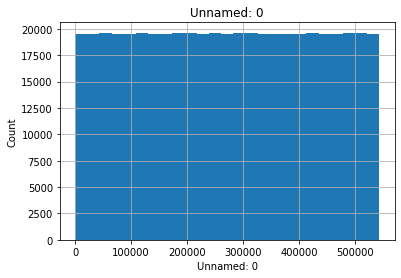

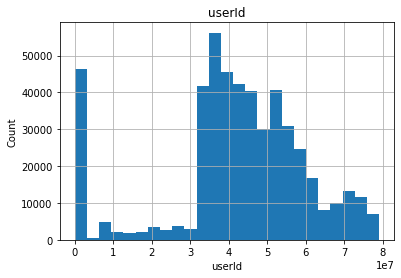

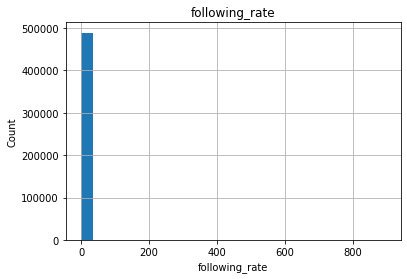

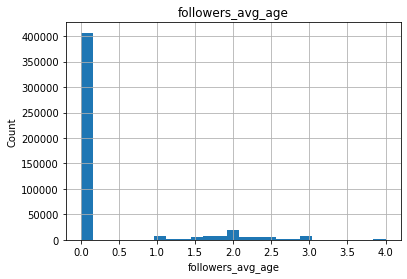

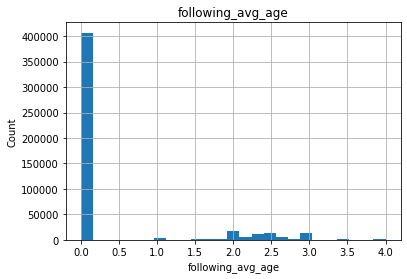

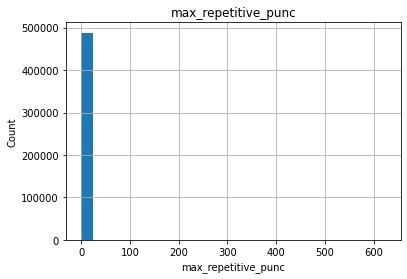

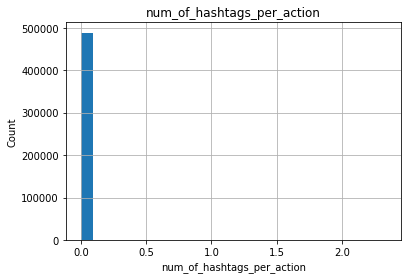

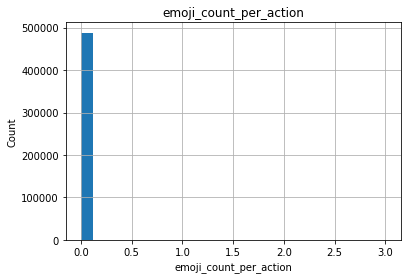

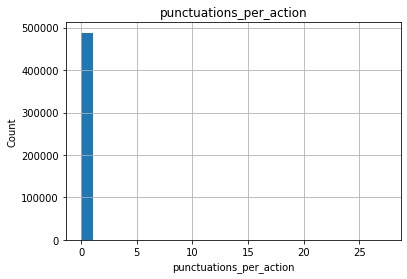

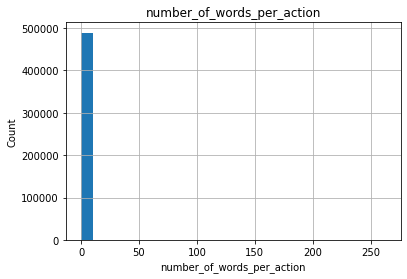

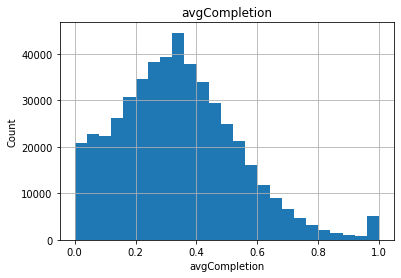

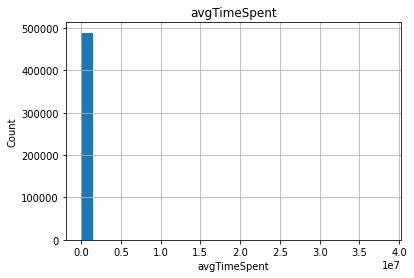

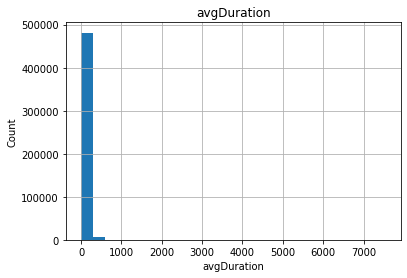

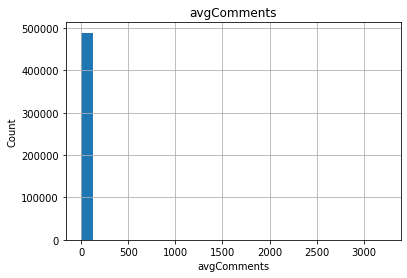

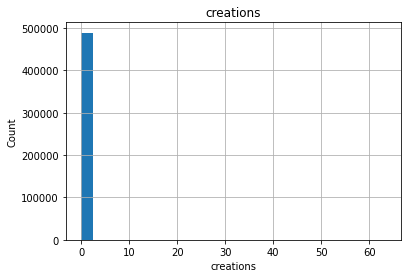

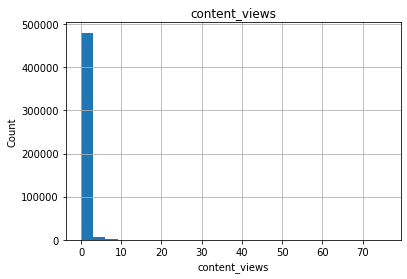

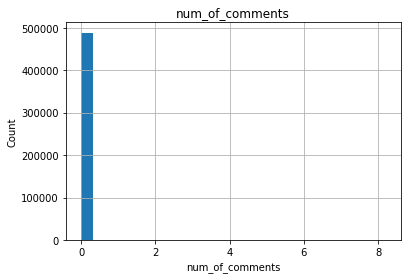

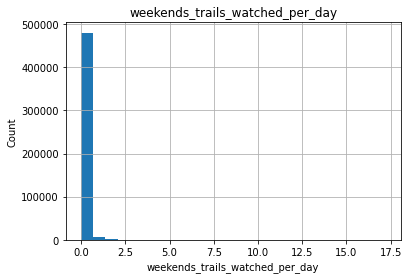

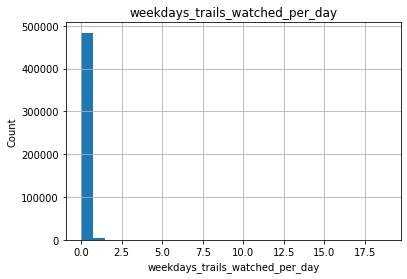

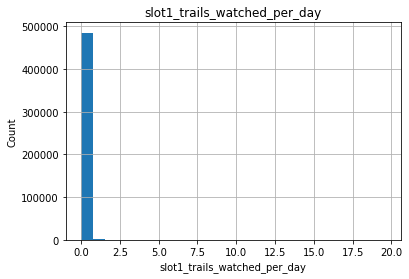

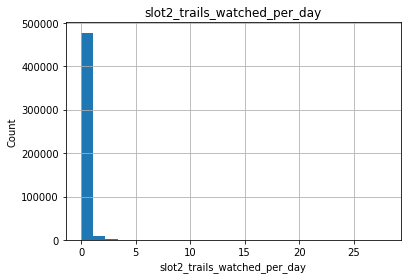

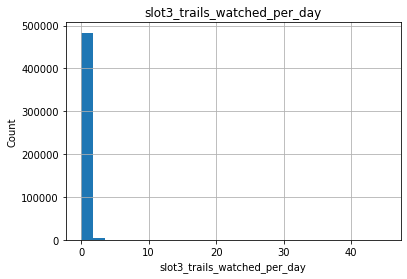

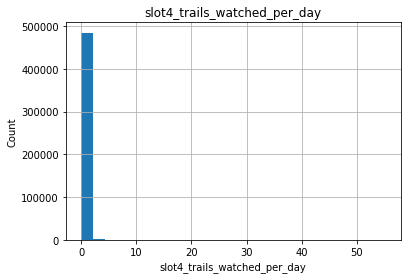

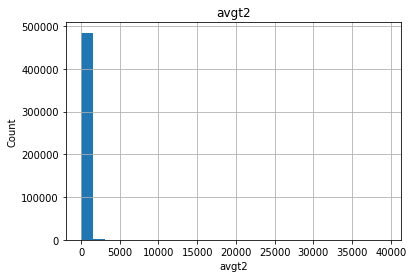

In [15]:
for feature in continuous_feature:
    data=train_full.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

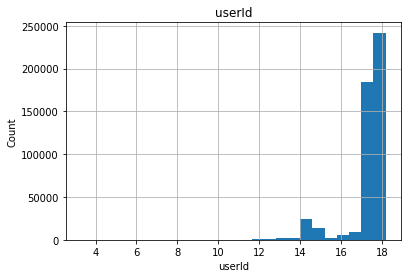

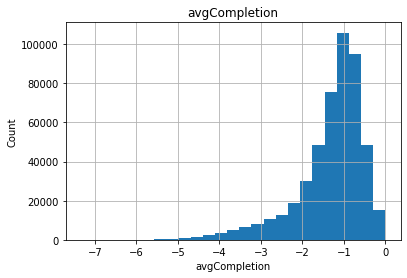

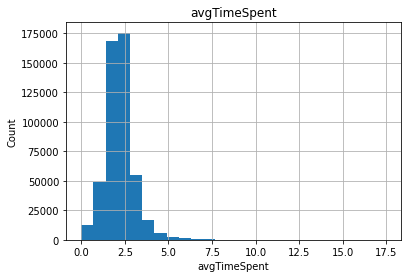

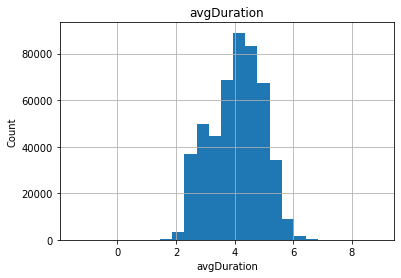

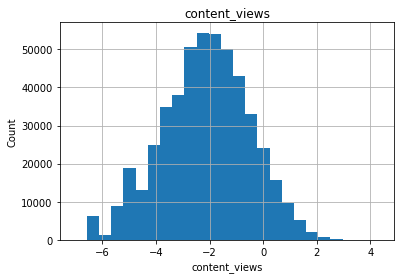

In [16]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

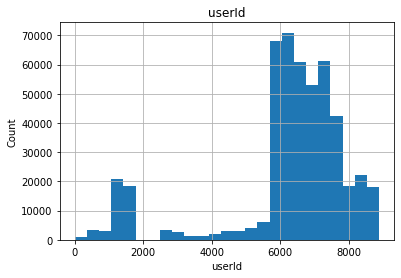

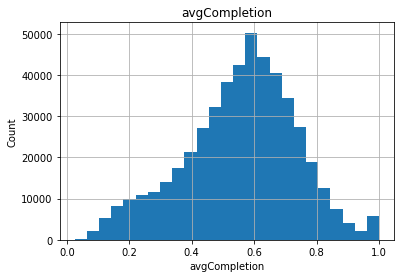

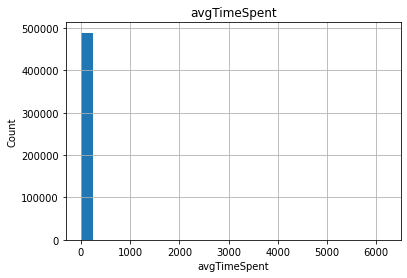

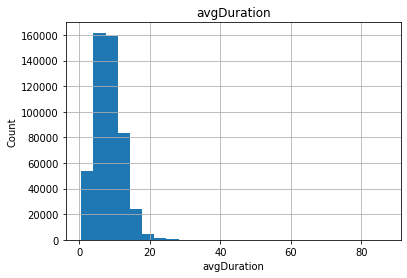

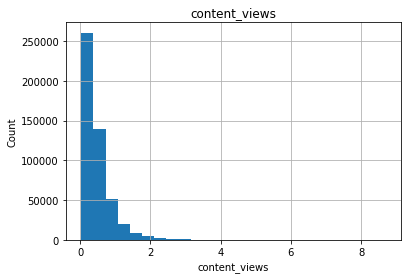

In [17]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.sqrt(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

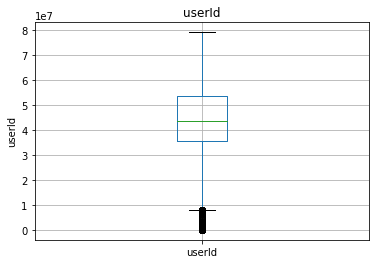

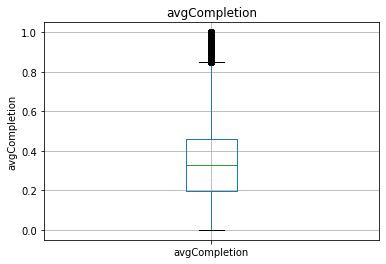

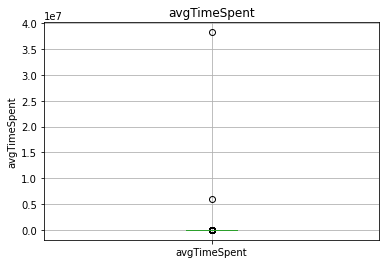

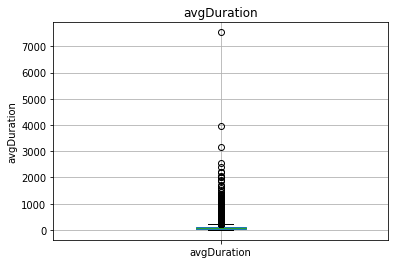

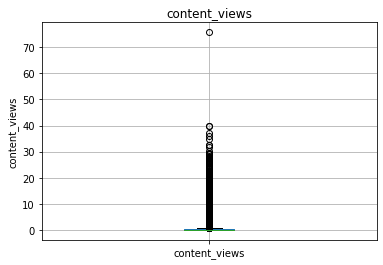

In [18]:
for feature in continuous_feature:
    data=train_full.copy()
    if 0 in data[feature].unique():
        pass
    else:
        #data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

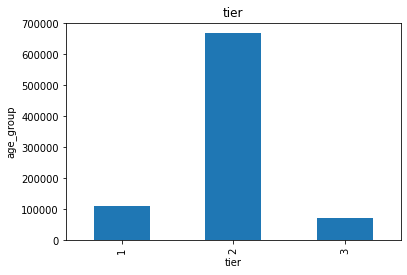

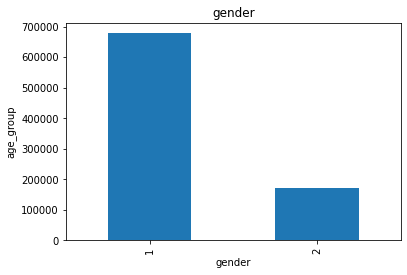

In [19]:
for feature in discrete_feature:
    data=train_full.copy()
    data.groupby(feature)['age_group'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('age_group')
    plt.title(feature)
    plt.xticks(rotation=90)
    plt.show()

In [20]:
skew_features = X_train[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)

In [21]:
skew_features

avgTimeSpent                       624.894706
avgComments                        244.018239
creations                          195.207720
following_rate                     180.547134
num_of_comments                    119.527048
num_of_hashtags_per_action          98.855396
punctuations_per_action             52.257177
emoji_count_per_action              50.701164
max_repetitive_punc                 47.355497
number_of_words_per_action          26.419772
slot1_trails_watched_per_day        25.961888
avgt2                               16.866665
slot4_trails_watched_per_day        16.548235
slot3_trails_watched_per_day        12.544110
slot2_trails_watched_per_day        11.379812
weekdays_trails_watched_per_day     10.984450
weekends_trails_watched_per_day     10.218266
content_views                        9.039011
avgDuration                          5.704517
followers_avg_age                    2.219810
following_avg_age                    2.021939
avgCompletion                     

In [22]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_train[i] = boxcox1p(X_train[i], boxcox_normmax(X_train[i] + 1))

In [23]:
skew_features = X_train[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features

num_of_hashtags_per_action         20.939031
emoji_count_per_action             10.309104
punctuations_per_action             3.962640
num_of_comments                     3.113391
avgComments                         3.112970
max_repetitive_punc                 2.364336
followers_avg_age                   2.075998
following_avg_age                   2.069720
slot1_trails_watched_per_day        1.797445
following_rate                      1.001971
number_of_words_per_action          0.789439
creations                           0.756961
weekends_trails_watched_per_day     0.697503
slot2_trails_watched_per_day        0.639050
slot3_trails_watched_per_day        0.615030
slot4_trails_watched_per_day        0.606759
avgt2                               0.568435
weekdays_trails_watched_per_day     0.288091
content_views                       0.204280
avgDuration                         0.054154
avgCompletion                       0.040431
Unnamed: 0                          0.000981
avgTimeSpe

In [24]:
skew_features = X_valid[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_valid[i] = boxcox1p(X_valid[i], boxcox_normmax(X_valid[i] + 1))

In [25]:
skew_features = X_test[continuous_feature].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    X_test[i] = boxcox1p(X_test[i], boxcox_normmax(X_test[i] + 1))

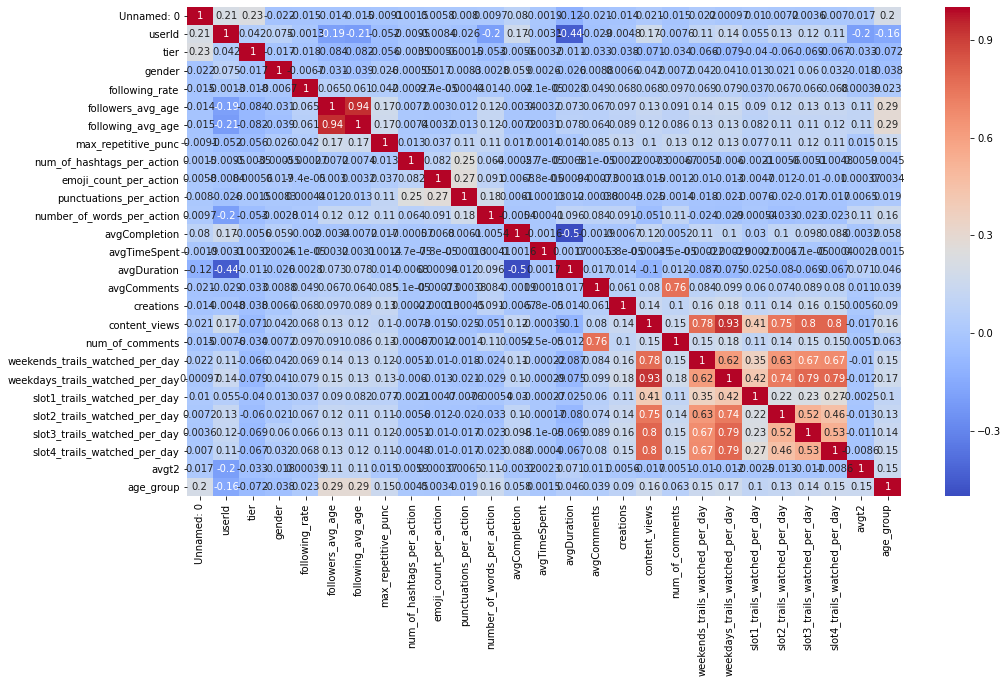

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(data=train_full.corr(),annot=True,cmap='coolwarm')
plt.show()

In [27]:
X_train_new1=X_train.copy()
X_valid_new1=X_valid.copy()
X_test_new1=X_test.copy()

In [28]:
X_train.drop(['Unnamed: 0','userId'],axis=1,inplace=True)
X_valid.drop(['Unnamed: 0','userId'],axis=1,inplace=True)
X_test.drop(['Unnamed: 0','userId'],axis=1,inplace=True)


In [29]:
X_train_new=X_train.drop(columns=['tier','gender','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action','avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments','num_of_comments'],axis=1)
X_valid_new=X_valid.drop(columns=['tier','gender','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action','avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments','num_of_comments'],axis=1)
X_test_new=X_test.drop(columns=['tier','gender','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action','avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments','num_of_comments'],axis=1)

In [30]:
X_train.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day',
       'avgt2'],
      dtype='object')

In [31]:
X_train.shape

(391101, 24)

In [32]:
X_train_new.shape

(391101, 14)

In [68]:
xgb=XGBClassifier(random_state=1,objective = 'multi:softmax',num_classes = 4,multilabel_ =True)
xgb.fit(X_train,y_train)
pred_val_prob=xgb.predict_proba(X_valid)[:,1]
pred_test_prob=xgb.predict_proba(X_test)[:,1]
pred_val=xgb.predict(X_valid)
pred_test=xgb.predict(X_test)
cm=confusion_matrix(np.square(y_valid),np.square(pred_val))
print(cm)


[[53972  4364  1157  2296]
 [ 1960  6810   866  2218]
 [ 1946  3479  2793  3761]
 [ 1721  2575  2006  5852]]


In [72]:
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

random = RandomizedSearchCV(estimator = xgb, param_distributions=params, scoring='f1_micro',cv=5)

random.fit(X_train,y_train)


KeyboardInterrupt: 

In [ ]:
random.best_params_

In [ ]:
xgbc=XGBClassifier(min_child_weight=1,max_depth=12,learning_rate=0.25,gamma=0.3,colsample_bytree=0.3,n_estimators=200,objective = 'multi:softmax')
xgbc.fit(X_train,y_train)
prediction_valid=xgbc.predict(X_valid)
prediction_test=xgbc.predict(X_test)
prediction_valid_prob=xgbc.predict_proba(X_valid)[:,1]
prediction_test_prob=xgbc.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_valid,prediction_valid)
print(cm)


In [57]:
pred_test

array([1, 1, 1, ..., 4, 1, 1])

In [58]:
pred_test=pd.DataFrame(pred_test)

In [59]:
pred_test

,0
0,1
1,1
2,1
3,2
4,1
...,...
54315,1
54316,1
54317,4
54318,1


In [52]:
pred_test.columns=['prediction']

In [53]:
pred_test

,prediction
0,1
1,1
2,1
3,2
4,1
...,...
54315,1
54316,1
54317,4
54318,1


In [54]:
pred_test.to_csv("submission.csv", index=False)

In [ ]:
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=4,
                    seed=27)


param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
random1= RandomizedSearchCV(estimator = xgb1,param_distributions= param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
random1.fit(X_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
